<a href="https://colab.research.google.com/github/madhuraj2211/Fake_news_classifier/blob/main/fake_News_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dataset Information**

Develop a Deep learning program to identify when an article might be fake news.

Attributes

id: unique id for a news article

title: the title of a news article

text: the text of the article; could be incomplete

label: a label that marks the article as potentially unreliable

1: unreliable
0: reliable

### **Import Modules**

In [34]:
!pip install wordcloud

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
import csv
%matplotlib inline
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## **Loading the Dataset**

In [36]:
df = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv')
df.head()


,id,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [37]:
df['title'][0]

'LAW ENFORCEMENT ON HIGH ALERT Following Threats Against Cops And Whites On 9-11By #BlackLivesMatter And #FYF911 Terrorists [VIDEO]'

In [38]:
df['text'][0]


'No comment is expected from Barack Obama Members of the #FYF911 or #FukYoFlag and #BlackLivesMatter movements called for the lynching and hanging of white people and cops. They encouraged others on a radio show Tuesday night to  turn the tide  and kill white people and cops to send a message about the killing of black people in America.One of the F***YoFlag organizers is called  Sunshine.  She has a radio blog show hosted from Texas called,  Sunshine s F***ing Opinion Radio Show. A snapshot of her #FYF911 @LOLatWhiteFear Twitter page at 9:53 p.m. shows that she was urging supporters to  Call now!! #fyf911 tonight we continue to dismantle the illusion of white Below is a SNAPSHOT Twitter Radio Call Invite   #FYF911The radio show aired at 10:00 p.m. eastern standard time.During the show, callers clearly call for  lynching  and  killing  of white people.A 2:39 minute clip from the radio show can be heard here. It was provided to Breitbart Texas by someone who would like to be referred to

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003 entries, 0 to 10002
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10003 non-null  int64 
 1   title   9938 non-null   object
 2   text    9995 non-null   object
 3   label   10003 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.7+ KB


### **Data Proprocessing**

In [40]:
# drop unnecessary columns
df = df.drop(columns=['id', 'title',], axis=1)

In [41]:
# drop null values
df = df.dropna(axis=0)

In [42]:
len(df)

9995

In [43]:
# remove special characters and punctuations

In [44]:
df['clean_news'] = df['text'].str.lower()
df['clean_news']

,clean_news
0,no comment is expected from barack obama membe...
1,did they post their votes for hillary already?
2,"now, most of the demonstrators gathered last ..."
3,a dozen politically active pastors came here f...
4,"the rs-28 sarmat missile, dubbed satan 2, will..."
...,...
9998,"cannes, france — the 69th cannes film festi..."
9999,republican party elected officials in conteste...
10000,\nthis article was written by alice salles and...
10001,"sittwe, myanmar (reuters) - myanmar s de facto..."


In [45]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')
df['clean_news']

,clean_news
0,no comment is expected from barack obama membe...
1,did they post their votes for hillary already?
2,"now, most of the demonstrators gathered last ..."
3,a dozen politically active pastors came here f...
4,"the rs-28 sarmat missile, dubbed satan 2, will..."
...,...
9998,"cannes, france — the 69th cannes film festi..."
9999,republican party elected officials in conteste...
10000,this article was written by alice salles and o...
10001,"sittwe, myanmar (reuters) - myanmar s de facto..."


In [46]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,No comment is expected from Barack Obama Membe...,1,comment expected barack obama members #fyf911 ...
1,Did they post their votes for Hillary already?,1,post votes hillary already?
2,"Now, most of the demonstrators gathered last ...",1,"now, demonstrators gathered last night exercis..."
3,A dozen politically active pastors came here f...,0,dozen politically active pastors came private ...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,"rs-28 sarmat missile, dubbed satan 2, replace ..."


### **Exploratory Data Analysis**

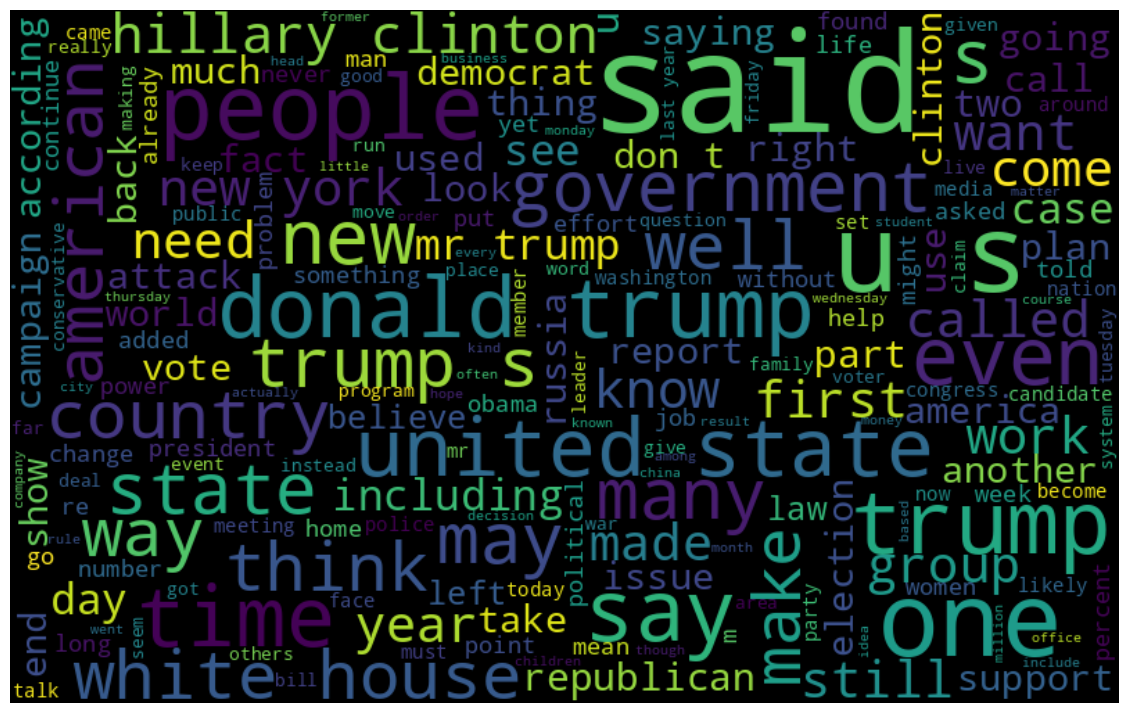

In [47]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_news']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

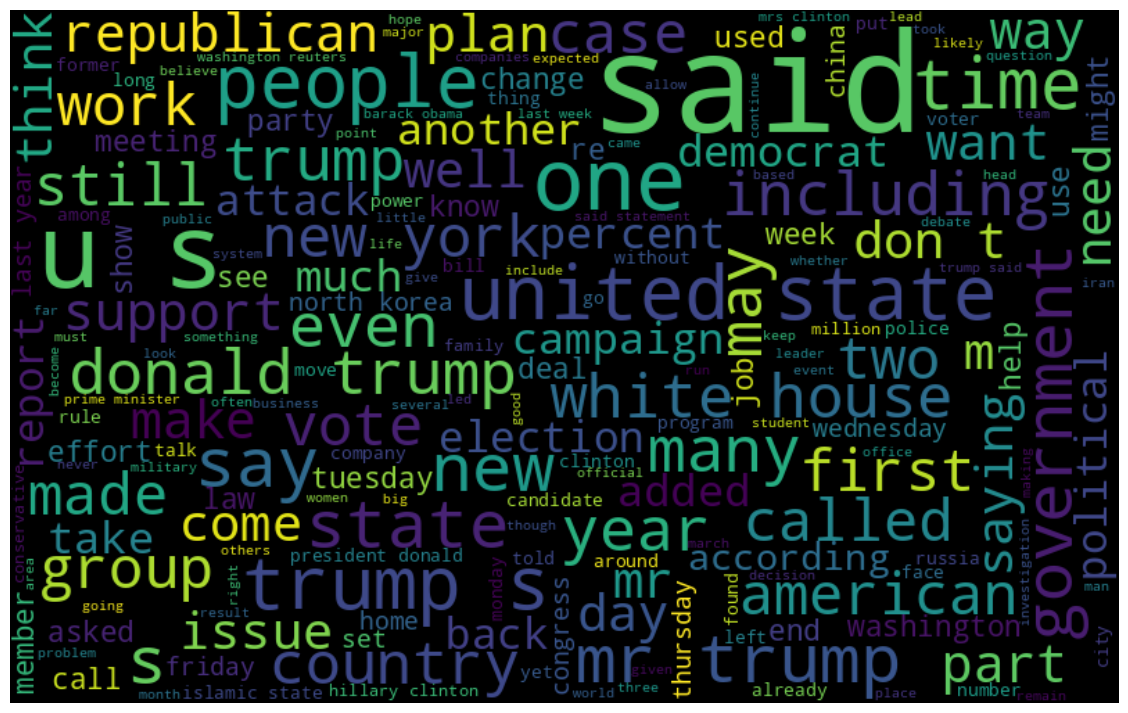

In [48]:
# visualize the frequent words for genuine news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

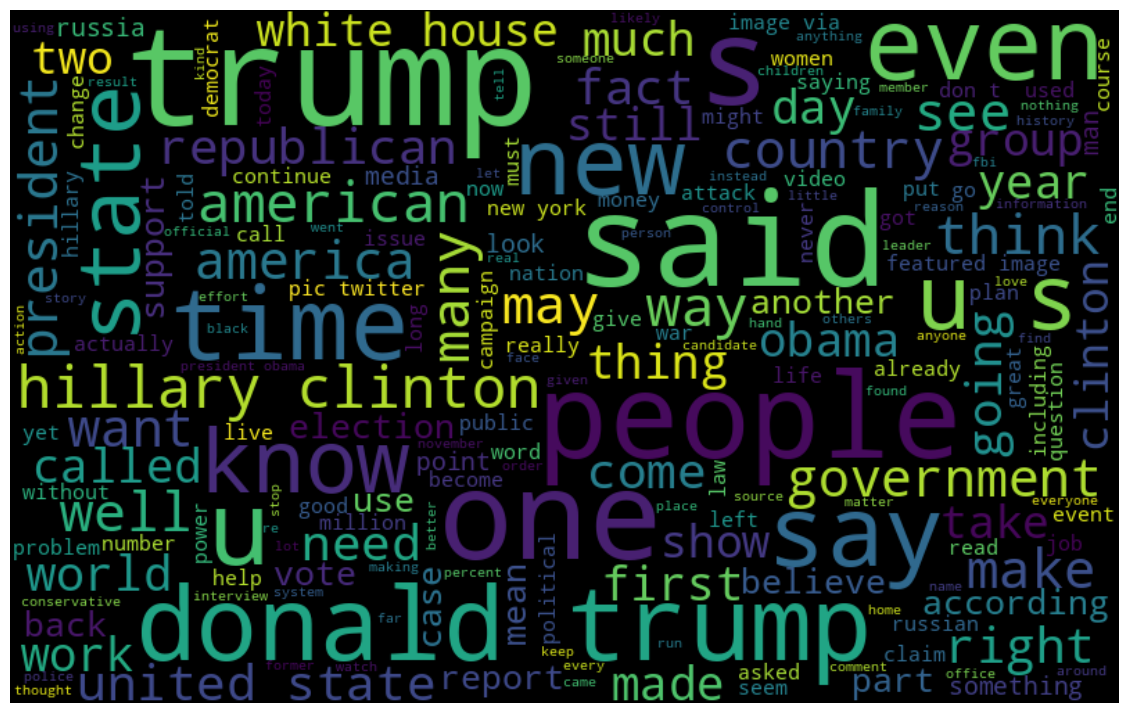

In [49]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### **Create Word Embeddings**

In [50]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [51]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

114428

In [52]:
# padding data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [53]:
# create embedding index
embedding_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [54]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [55]:
embedding_matrix[1]

array([-0.13128   , -0.45199999,  0.043399  , -0.99798   , -0.21053   ,
       -0.95867997, -0.24608999,  0.48413   ,  0.18178   ,  0.47499999,
       -0.22305   ,  0.30063999,  0.43496001, -0.36050001,  0.20245001,
       -0.52594   , -0.34707999,  0.0075873 , -1.04970002,  0.18673   ,
        0.57369   ,  0.43814   ,  0.098659  ,  0.38769999, -0.22579999,
        0.41911   ,  0.043602  , -0.73519999, -0.53583002,  0.19276001,
       -0.21961001,  0.42515001, -0.19081999,  0.47187001,  0.18826   ,
        0.13357   ,  0.41839001,  1.31379998,  0.35677999, -0.32172   ,
       -1.22570002, -0.26635   ,  0.36715999, -0.27586001, -0.53245997,
        0.16786   , -0.11253   , -0.99958998, -0.60706002, -0.89270997,
        0.65156001, -0.88783997,  0.049233  ,  0.67110997, -0.27553001,
       -2.40050006, -0.36989   ,  0.29135999,  1.34979999,  1.73529994,
        0.27000001,  0.021299  ,  0.14421999,  0.023784  ,  0.33643001,
       -0.35475999,  1.09210002,  1.48450005,  0.49430001,  0.15

### **Input Split**

In [56]:
padded_seq[1]

array([218, 513,  41, 186,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

### **Model Training**

In [58]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

# model = Sequential([
#     Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
#     Dropout(0.2),
#     LSTM(128, return_sequences=True),
#     LSTM(128),
#     Dropout(0.2),
#     Dense(512),
#     Dropout(0.2),
#     Dense(256),
#     Dense(1, activation='sigmoid')
# ])

model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [59]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         11442900  
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 11593429 (44.23 MB)
Trainable params: 15

In [60]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 46s 1s/step - loss: 0.6810 - accuracy: 0.5639 - val_loss: 0.6704 - val_accuracy: 0.5823
Epoch 2/10
32/32 [==============================] - 43s 1s/step - loss: 0.6781 - accuracy: 0.5777 - val_loss: 0.6789 - val_accuracy: 0.5813
Epoch 3/10
32/32 [==============================] - 44s 1s/step - loss: 0.6871 - accuracy: 0.6034 - val_loss: 0.7106 - val_accuracy: 0.5328
Epoch 4/10
32/32 [==============================] - 43s 1s/step - loss: 0.6858 - accuracy: 0.5588 - val_loss: 0.6828 - val_accuracy: 0.5673
Epoch 5/10
32/32 [==============================] - 44s 1s/step - loss: 0.6827 - accuracy: 0.5463 - val_loss: 0.6780 - val_accuracy: 0.5668
Epoch 6/10
32/32 [==============================] - 43s 1s/step - loss: 0.6773 - accuracy: 0.5590 - val_loss: 0.6736 - val_accuracy: 0.5708
Epoch 7/10
32/32 [==============================] - 44s 1s/step - loss: 0.6704 - accuracy: 0.5658 - val_loss: 0.6713 - val_accuracy: 0.5778
Epoch 8/10
32/32 [==

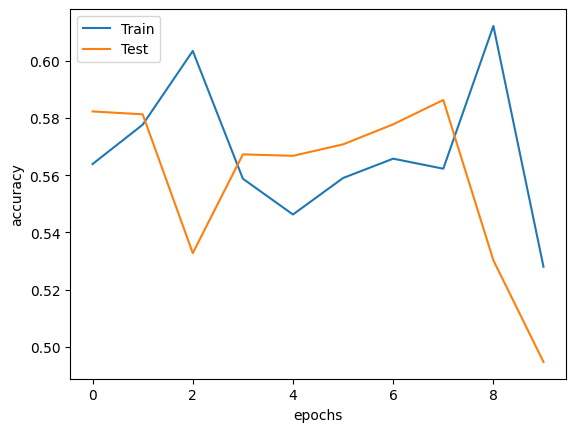

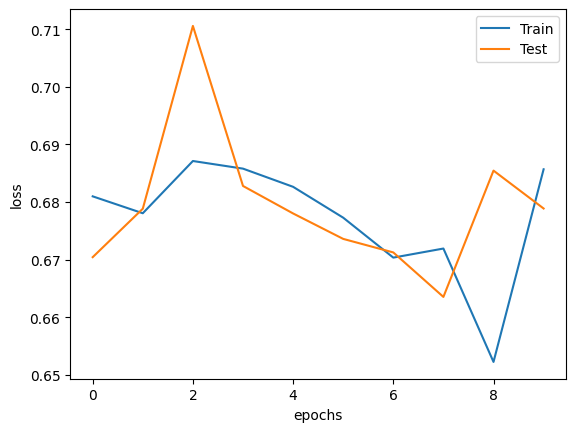

In [61]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [62]:
# prompt: calculate F1 score

from sklearn.metrics import f1_score
y_pred = (model.predict(x_test) > 0.5).astype("int32")
f1_score(y_test, y_pred)


63/63 [==============================] - 10s 149ms/step


0.061338289962825275